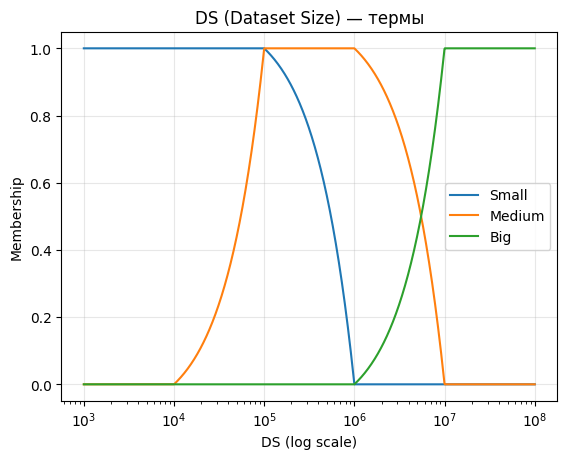

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trapmf(x, a, b, c, d):
    """
    Трапециевидная функция принадлежности (кусочно-линейная).
    Поддерживает "плечи": a==b (левое), c==d (правое).
    """
    x = np.asarray(x, dtype=float)
    y = np.zeros_like(x)

    # рост
    if b > a:
        idx = (x >= a) & (x < b)
        y[idx] = (x[idx] - a) / (b - a)
    else:
        y[x <= b] = 1.0  # левое плечо

    # плато
    idx = (x >= b) & (x <= c)
    y[idx] = 1.0

    # спад
    if d > c:
        idx = (x > c) & (x <= d)
        y[idx] = (d - x[idx]) / (d - c)
    else:
        y[x >= c] = 1.0  # правое плечо

    y[(x < a) | (x > d)] = 0.0
    return y

def trapmf_single(x, params):
    a, b, c, d = params
    return float(trapmf(np.array([x]), a, b, c, d)[0])

# Термы
DS_terms = {
    "Small":  (1e3, 1e3, 1e5, 1e6),
    "Medium": (1e4, 1e5, 1e6, 1e7),
    "Big":    (1e6, 1e7, 1e8, 1e8),
}
L_terms = {
    "Few":    (0, 0, 1, 2),
    "Medium": (1, 2, 3, 4),
    "A lot":  (2, 4, 5, 5),
}
P_terms = {
    "Small":  (1e3, 1e4, 1e5, 1e6),
    "Medium": (1e5, 1e6, 1e7, 1e8),
    "Big":    (1e7, 1e8, 1e9, 1e10),
}
MSE_terms = {
    "Low":       (0, 0, 50, 60),
    "Medium":    (50, 60, 70, 80),
    "High":      (70, 80, 90, 100),
    "Excellent": (80, 90, 100, 100),
}

# База правил (27)
rules = [
    ("Small","Few","Small","Low"),
    ("Small","Few","Medium","Low"),
    ("Small","Few","Big","Low"),
    ("Small","Medium","Small","Low"),
    ("Small","Medium","Medium","Medium"),
    ("Small","Medium","Big","Medium"),
    ("Small","A lot","Small","Medium"),
    ("Small","A lot","Medium","Medium"),
    ("Small","A lot","Big","High"),

    ("Medium","Few","Small","Low"),
    ("Medium","Few","Medium","Medium"),
    ("Medium","Few","Big","Medium"),
    ("Medium","Medium","Small","Medium"),
    ("Medium","Medium","Medium","Medium"),
    ("Medium","Medium","Big","High"),
    ("Medium","A lot","Small","Medium"),
    ("Medium","A lot","Medium","High"),
    ("Medium","A lot","Big","Excellent"),

    ("Big","Few","Small","Medium"),
    ("Big","Few","Medium","Medium"),
    ("Big","Few","Big","High"),
    ("Big","Medium","Small","Medium"),
    ("Big","Medium","Medium","High"),
    ("Big","Medium","Big","Excellent"),
    ("Big","A lot","Small","High"),
    ("Big","A lot","Medium","Excellent"),
    ("Big","A lot","Big","Excellent"),
]

# Универсумы (нелинейные сетки для больших диапазонов)
ds_x  = np.logspace(3, 8, 1200)     # 1e3..1e8
p_x   = np.logspace(3, 10, 1400)    # 1e3..1e10
l_x   = np.linspace(0, 5, 800)
mse_x = np.linspace(0, 100, 1200)

plt.figure()
for name, params in DS_terms.items():
    plt.plot(ds_x, trapmf(ds_x, *params), label=name)
plt.xscale("log")
plt.title("DS (Dataset Size) — термы")
plt.xlabel("DS (log scale)")
plt.ylabel("Membership")
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


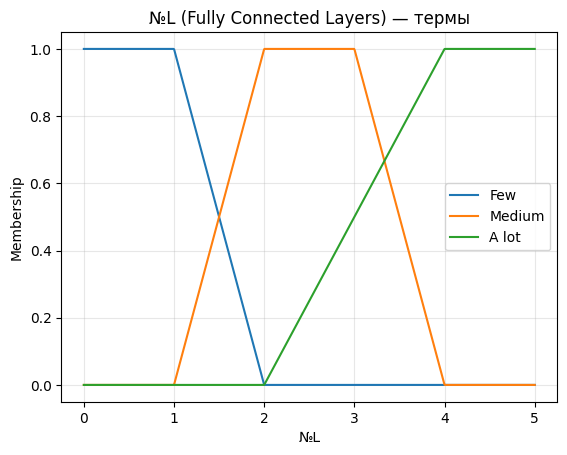

In [2]:
plt.figure()
for name, params in L_terms.items():
    plt.plot(l_x, trapmf(l_x, *params), label=name)
plt.title("№L (Fully Connected Layers) — термы")
plt.xlabel("№L")
plt.ylabel("Membership")
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


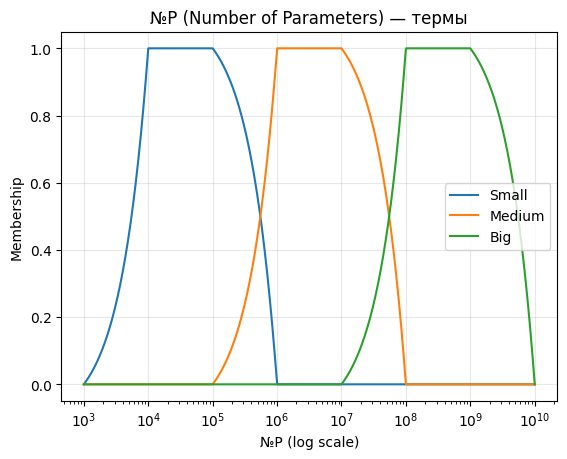

In [3]:
plt.figure()
for name, params in P_terms.items():
    plt.plot(p_x, trapmf(p_x, *params), label=name)
plt.xscale("log")
plt.title("№P (Number of Parameters) — термы")
plt.xlabel("№P (log scale)")
plt.ylabel("Membership")
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


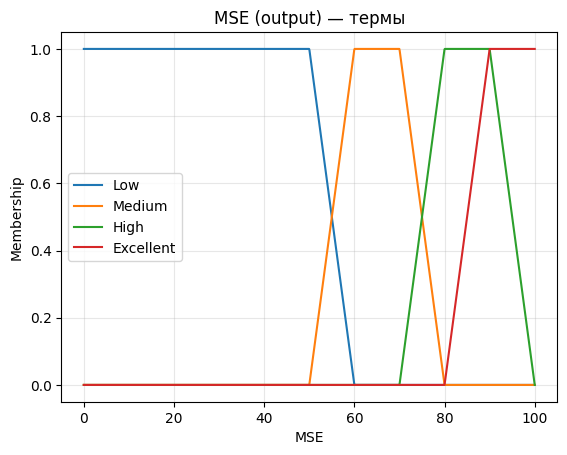

In [4]:
plt.figure()
for name, params in MSE_terms.items():
    plt.plot(mse_x, trapmf(mse_x, *params), label=name)
plt.title("MSE (output) — термы")
plt.xlabel("MSE")
plt.ylabel("Membership")
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


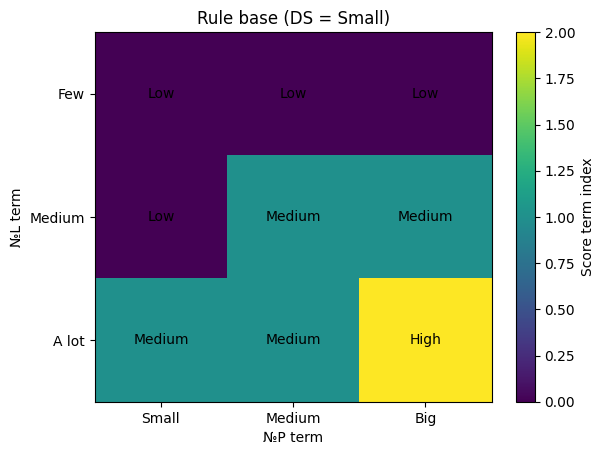

In [5]:
out_order = ["Low", "Medium", "High", "Excellent"]
out_to_idx = {o: i for i, o in enumerate(out_order)}
L_order = ["Few", "Medium", "A lot"]
P_order = ["Small", "Medium", "Big"]

rule_map = {(ds, l, p): out_to_idx[out] for ds, l, p, out in rules}

ds = "Small"
mat = np.zeros((len(L_order), len(P_order)), dtype=int)
for i, l in enumerate(L_order):
    for j, p in enumerate(P_order):
        mat[i, j] = rule_map[(ds, l, p)]

plt.figure()
plt.imshow(mat, aspect="auto", interpolation="nearest")
plt.xticks(range(len(P_order)), P_order)
plt.yticks(range(len(L_order)), L_order)
plt.title("Rule base (DS = Small)")
plt.xlabel("№P term")
plt.ylabel("№L term")
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(j, i, out_order[mat[i, j]], ha="center", va="center")
plt.colorbar(label="Score term index")
plt.show()


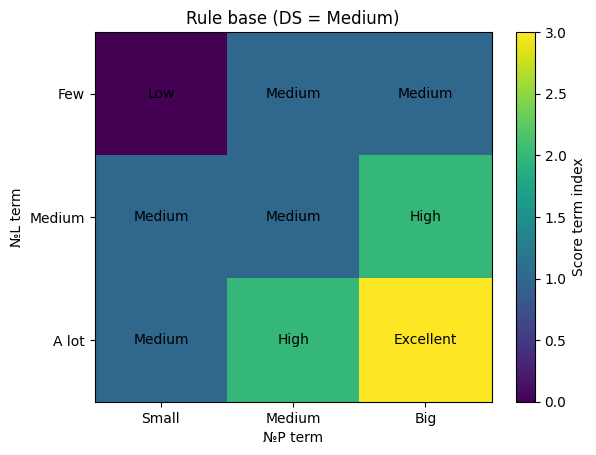

In [6]:
ds = "Medium"
mat = np.zeros((len(L_order), len(P_order)), dtype=int)
for i, l in enumerate(L_order):
    for j, p in enumerate(P_order):
        mat[i, j] = rule_map[(ds, l, p)]

plt.figure()
plt.imshow(mat, aspect="auto", interpolation="nearest")
plt.xticks(range(len(P_order)), P_order)
plt.yticks(range(len(L_order)), L_order)
plt.title("Rule base (DS = Medium)")
plt.xlabel("№P term")
plt.ylabel("№L term")
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(j, i, out_order[mat[i, j]], ha="center", va="center")
plt.colorbar(label="Score term index")
plt.show()


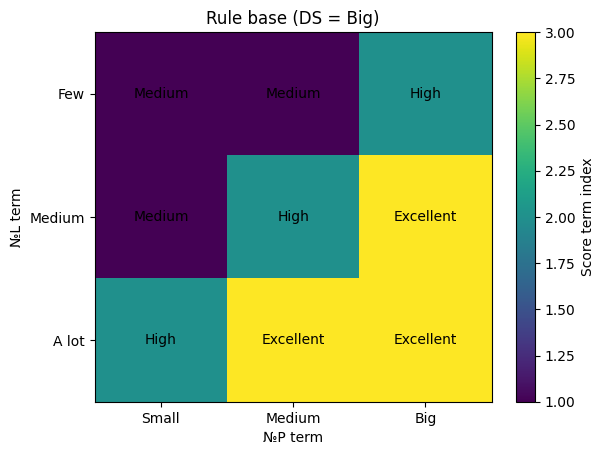

In [7]:
ds = "Big"
mat = np.zeros((len(L_order), len(P_order)), dtype=int)
for i, l in enumerate(L_order):
    for j, p in enumerate(P_order):
        mat[i, j] = rule_map[(ds, l, p)]

plt.figure()
plt.imshow(mat, aspect="auto", interpolation="nearest")
plt.xticks(range(len(P_order)), P_order)
plt.yticks(range(len(L_order)), L_order)
plt.title("Rule base (DS = Big)")
plt.xlabel("№P term")
plt.ylabel("№L term")
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        plt.text(j, i, out_order[mat[i, j]], ha="center", va="center")
plt.colorbar(label="Score term index")
plt.show()


In [8]:
def firing_strength(ds_value, l_value, p_value, ds_term, l_term, p_term):
    mu_ds = trapmf_single(ds_value, DS_terms[ds_term])
    mu_l  = trapmf_single(l_value,  L_terms[l_term])
    mu_p  = trapmf_single(p_value,  P_terms[p_term])
    w = min(mu_ds, mu_l, mu_p)  # как просили
    return w, (mu_ds, mu_l, mu_p)

def mamdani_infer(ds_value, l_value, p_value, x_out=mse_x):
    fired = []
    aggregated = np.zeros_like(x_out, dtype=float)

    for ds_t, l_t, p_t, out_t in rules:
        w, mus = firing_strength(ds_value, l_value, p_value, ds_t, l_t, p_t)
        if w > 0:
            fired.append((ds_t, l_t, p_t, out_t, w, mus))

            base = trapmf(x_out, *MSE_terms[out_t])
            scaled = w * base
            aggregated = np.maximum(aggregated, scaled)  # максимум по трапециям

    area = np.trapz(aggregated, x_out)
    centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area
    return fired, aggregated, centroid


In [9]:
def firing_strength(ds_value, l_value, p_value, ds_term, l_term, p_term):
    mu_ds = trapmf_single(ds_value, DS_terms[ds_term])
    mu_l  = trapmf_single(l_value,  L_terms[l_term])
    mu_p  = trapmf_single(p_value,  P_terms[p_term])
    w = min(mu_ds, mu_l, mu_p)
    return w

def mamdani_centroid(ds_value, l_value, p_value, x_out=mse_x):
    aggregated = np.zeros_like(x_out, dtype=float)

    for ds_t, l_t, p_t, out_t in rules:
        w = firing_strength(ds_value, l_value, p_value, ds_t, l_t, p_t)
        if w <= 0:
            continue
        base = trapmf(x_out, *MSE_terms[out_t])
        scaled = w * base
        aggregated = np.maximum(aggregated, scaled)  # max по трапециям

    area = np.trapz(aggregated, x_out)
    centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area
    return centroid

def evaluate_over_ds(model_name, L_fc, P_params, ds_values):
    """
    Возвращает массив оценок MSE (центроид) для фиксированной модели (L_fc, P_params)
    при разных DS.
    """
    mses = []
    for ds in ds_values:
        mses.append(mamdani_centroid(ds_value=ds, l_value=L_fc, p_value=P_params))
    return np.array(mses, dtype=float)


/tmp/ipython-input-711374251.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(aggregated, x_out)
/tmp/ipython-input-711374251.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area


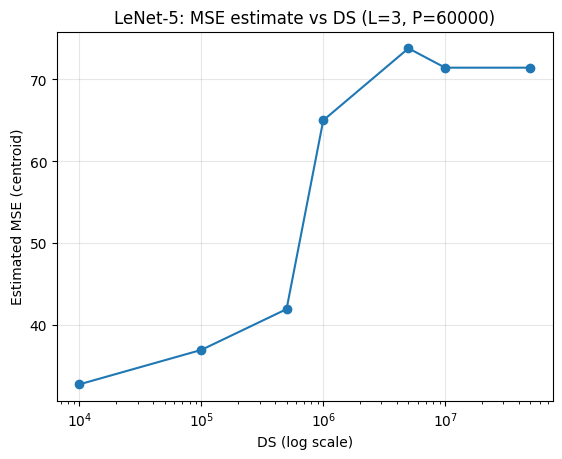

LeNet-5
  DS=10000 -> MSE≈32.75
  DS=100000 -> MSE≈36.95
  DS=500000 -> MSE≈41.94
  DS=1e+06 -> MSE≈65.00
  DS=5e+06 -> MSE≈73.80
  DS=1e+07 -> MSE≈71.44
  DS=5e+07 -> MSE≈71.44


In [10]:
# LeNet-5 (FC=3, Params≈60k) — оценка MSE при разных DS (1 график)
model_name = "LeNet-5"
L_fc = 3
P_params = 6e4  # ~60k

ds_values = np.array([1e4, 1e5, 5e5, 1e6, 5e6, 1e7, 5e7], dtype=float)  # разные DS
mses = evaluate_over_ds(model_name, L_fc, P_params, ds_values)

plt.figure()
plt.plot(ds_values, mses, marker="o")
plt.xscale("log")  # нелинейность в визуализации
plt.title(f"{model_name}: MSE estimate vs DS (L={L_fc}, P={P_params:g})")
plt.xlabel("DS (log scale)")
plt.ylabel("Estimated MSE (centroid)")
plt.grid(True, alpha=0.3)
plt.show()

print(model_name)
for ds, mse in zip(ds_values, mses):
    print(f"  DS={ds:g} -> MSE≈{mse:.2f}")

/tmp/ipython-input-711374251.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(aggregated, x_out)
/tmp/ipython-input-711374251.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area


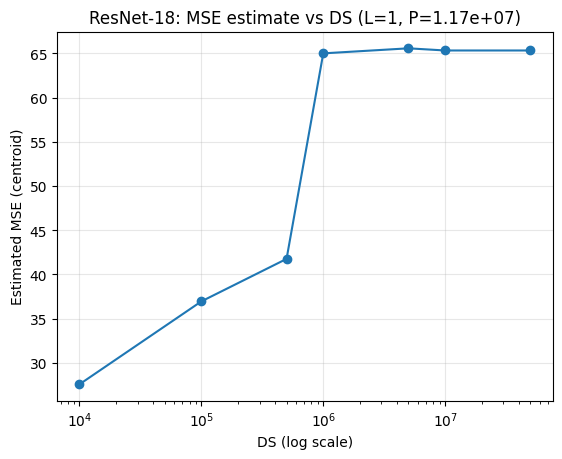

ResNet-18
  DS=10000 -> MSE≈27.58
  DS=100000 -> MSE≈36.95
  DS=500000 -> MSE≈41.76
  DS=1e+06 -> MSE≈65.00
  DS=5e+06 -> MSE≈65.57
  DS=1e+07 -> MSE≈65.33
  DS=5e+07 -> MSE≈65.33


In [11]:
# ResNet-18 (FC=1, Params≈11.7M) — оценка MSE при разных DS (1 график)
model_name = "ResNet-18"
L_fc = 1
P_params = 11.7e6  # ~11.7M

ds_values = np.array([1e4, 1e5, 5e5, 1e6, 5e6, 1e7, 5e7], dtype=float)
mses = evaluate_over_ds(model_name, L_fc, P_params, ds_values)

plt.figure()
plt.plot(ds_values, mses, marker="o")
plt.xscale("log")
plt.title(f"{model_name}: MSE estimate vs DS (L={L_fc}, P={P_params:g})")
plt.xlabel("DS (log scale)")
plt.ylabel("Estimated MSE (centroid)")
plt.grid(True, alpha=0.3)
plt.show()

print(model_name)
for ds, mse in zip(ds_values, mses):
    print(f"  DS={ds:g} -> MSE≈{mse:.2f}")


/tmp/ipython-input-711374251.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(aggregated, x_out)
/tmp/ipython-input-711374251.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area


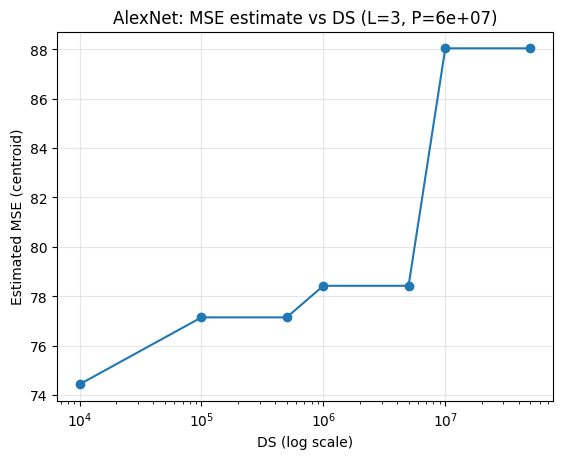

AlexNet
  DS=10000 -> MSE≈74.43
  DS=100000 -> MSE≈77.14
  DS=500000 -> MSE≈77.14
  DS=1e+06 -> MSE≈78.42
  DS=5e+06 -> MSE≈78.42
  DS=1e+07 -> MSE≈88.04
  DS=5e+07 -> MSE≈88.04


In [12]:
# AlexNet (FC=3, Params≈60M) — оценка MSE при разных DS (1 график)
model_name = "AlexNet"
L_fc = 3
P_params = 60e6  # ~60M

ds_values = np.array([1e4, 1e5, 5e5, 1e6, 5e6, 1e7, 5e7], dtype=float)
mses = evaluate_over_ds(model_name, L_fc, P_params, ds_values)

plt.figure()
plt.plot(ds_values, mses, marker="o")
plt.xscale("log")
plt.title(f"{model_name}: MSE estimate vs DS (L={L_fc}, P={P_params:g})")
plt.xlabel("DS (log scale)")
plt.ylabel("Estimated MSE (centroid)")
plt.grid(True, alpha=0.3)
plt.show()

print(model_name)
for ds, mse in zip(ds_values, mses):
    print(f"  DS={ds:g} -> MSE≈{mse:.2f}")


/tmp/ipython-input-711374251.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(aggregated, x_out)
/tmp/ipython-input-711374251.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area


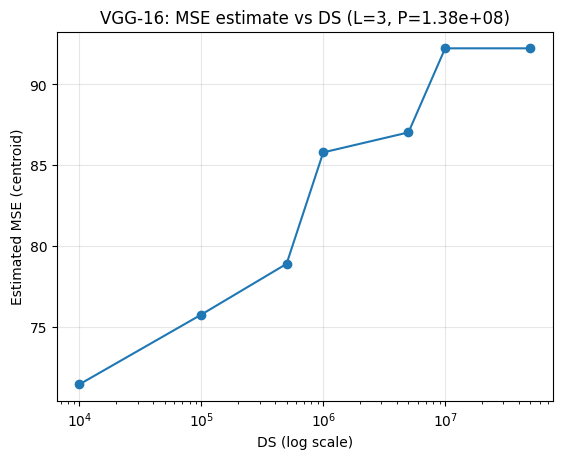

VGG-16
  DS=10000 -> MSE≈71.44
  DS=100000 -> MSE≈75.75
  DS=500000 -> MSE≈78.89
  DS=1e+06 -> MSE≈85.78
  DS=5e+06 -> MSE≈87.02
  DS=1e+07 -> MSE≈92.22
  DS=5e+07 -> MSE≈92.22


In [13]:
# VGG-16 (FC=3, Params≈138M) — оценка MSE при разных DS (1 график)
model_name = "VGG-16"
L_fc = 3
P_params = 138e6  # ~138M

ds_values = np.array([1e4, 1e5, 5e5, 1e6, 5e6, 1e7, 5e7], dtype=float)
mses = evaluate_over_ds(model_name, L_fc, P_params, ds_values)

plt.figure()
plt.plot(ds_values, mses, marker="o")
plt.xscale("log")
plt.title(f"{model_name}: MSE estimate vs DS (L={L_fc}, P={P_params:g})")
plt.xlabel("DS (log scale)")
plt.ylabel("Estimated MSE (centroid)")
plt.grid(True, alpha=0.3)
plt.show()

print(model_name)
for ds, mse in zip(ds_values, mses):
    print(f"  DS={ds:g} -> MSE≈{mse:.2f}")


In [14]:
import numpy as np

DS_WEIGHTS = {
    1e4:  0.025,
    1e5:  0.05,
    5e5:  0.075,
    1e6:  0.1,
    5e6:  0.2,
    1e7:  0.25,
    5e7:  0.3,
}

ds_values = np.array(list(DS_WEIGHTS.keys()), dtype=float)
weights   = np.array([DS_WEIGHTS[ds] for ds in ds_values], dtype=float)

print("Sum of weights =", weights.sum())


Sum of weights = 1.0


In [15]:
import matplotlib.pyplot as plt

def plot_model_with_aggregate(model_name, L_fc, P_params, ds_values, weights):
    mses = evaluate_over_ds(model_name, L_fc, P_params, ds_values)

    # взвешенная сумма (агрегированная оценка)
    agg_mse = float(np.sum(mses * weights))

    plt.figure()
    plt.plot(ds_values, mses, marker="o", label="Score per DS")
    plt.axhline(agg_mse, linestyle="--", linewidth=2, label=f"Aggregated Score = {agg_mse:.2f}", color='red')
    plt.xscale("log")
    plt.title(f"{model_name}: Score estimate vs DS (L={L_fc}, P={P_params:g})")
    plt.xlabel("DS (log scale)")
    plt.ylabel("Estimated Score (centroid)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print(model_name)
    for ds, mse, w in zip(ds_values, mses, weights):
        print(f"  DS={ds:g} (w={w:.3f}) -> Score≈{mse:.2f}")
    print(f"  Aggregated (weighted sum) Score≈{agg_mse:.2f}")

    return mses, agg_mse


/tmp/ipython-input-711374251.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(aggregated, x_out)
/tmp/ipython-input-711374251.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area


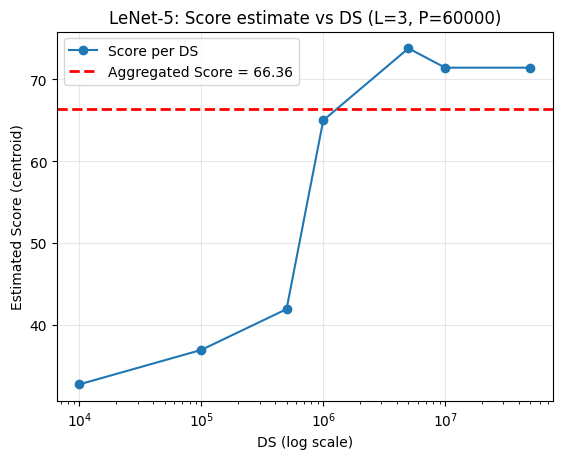

LeNet-5
  DS=10000 (w=0.025) -> Score≈32.75
  DS=100000 (w=0.050) -> Score≈36.95
  DS=500000 (w=0.075) -> Score≈41.94
  DS=1e+06 (w=0.100) -> Score≈65.00
  DS=5e+06 (w=0.200) -> Score≈73.80
  DS=1e+07 (w=0.250) -> Score≈71.44
  DS=5e+07 (w=0.300) -> Score≈71.44
  Aggregated (weighted sum) Score≈66.36


In [16]:
# LeNet-5 (FC=3, Params≈60k) — график + агрегированная оценка
model_name = "LeNet-5"
L_fc = 3
P_params = 6e4  # ~60k

_ = plot_model_with_aggregate(model_name, L_fc, P_params, ds_values, weights)


/tmp/ipython-input-711374251.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(aggregated, x_out)
/tmp/ipython-input-711374251.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area


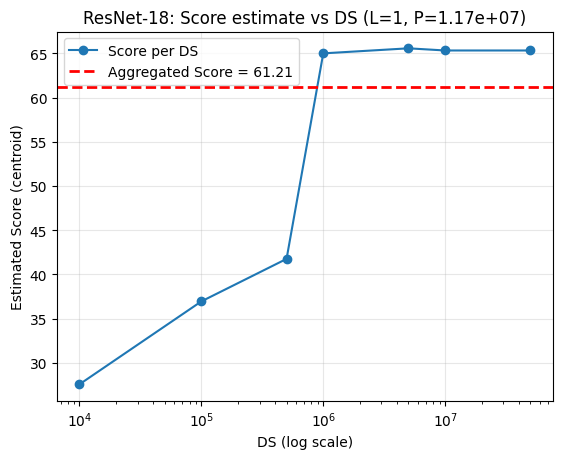

ResNet-18
  DS=10000 (w=0.025) -> Score≈27.58
  DS=100000 (w=0.050) -> Score≈36.95
  DS=500000 (w=0.075) -> Score≈41.76
  DS=1e+06 (w=0.100) -> Score≈65.00
  DS=5e+06 (w=0.200) -> Score≈65.57
  DS=1e+07 (w=0.250) -> Score≈65.33
  DS=5e+07 (w=0.300) -> Score≈65.33
  Aggregated (weighted sum) Score≈61.21


In [17]:
# ResNet-18 (FC=1, Params≈11.7M) — график + агрегированная оценка
model_name = "ResNet-18"
L_fc = 1
P_params = 11.7e6  # ~11.7M

_ = plot_model_with_aggregate(model_name, L_fc, P_params, ds_values, weights)


/tmp/ipython-input-711374251.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(aggregated, x_out)
/tmp/ipython-input-711374251.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area


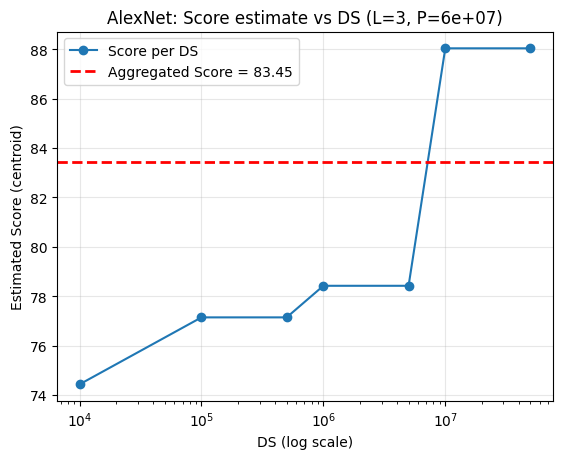

AlexNet
  DS=10000 (w=0.025) -> Score≈74.43
  DS=100000 (w=0.050) -> Score≈77.14
  DS=500000 (w=0.075) -> Score≈77.14
  DS=1e+06 (w=0.100) -> Score≈78.42
  DS=5e+06 (w=0.200) -> Score≈78.42
  DS=1e+07 (w=0.250) -> Score≈88.04
  DS=5e+07 (w=0.300) -> Score≈88.04
  Aggregated (weighted sum) Score≈83.45


In [18]:
# AlexNet (FC=3, Params≈60M) — график + агрегированная оценка
model_name = "AlexNet"
L_fc = 3
P_params = 60e6  # ~60M

_ = plot_model_with_aggregate(model_name, L_fc, P_params, ds_values, weights)


/tmp/ipython-input-711374251.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(aggregated, x_out)
/tmp/ipython-input-711374251.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  centroid = np.nan if area == 0 else np.trapz(aggregated * x_out, x_out) / area


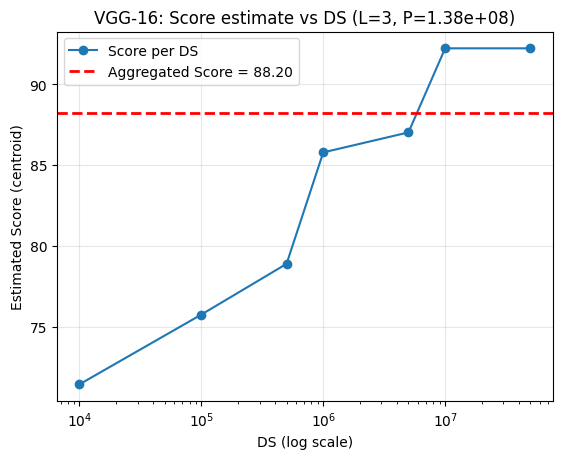

VGG-16
  DS=10000 (w=0.025) -> Score≈71.44
  DS=100000 (w=0.050) -> Score≈75.75
  DS=500000 (w=0.075) -> Score≈78.89
  DS=1e+06 (w=0.100) -> Score≈85.78
  DS=5e+06 (w=0.200) -> Score≈87.02
  DS=1e+07 (w=0.250) -> Score≈92.22
  DS=5e+07 (w=0.300) -> Score≈92.22
  Aggregated (weighted sum) Score≈88.20


In [19]:
# VGG-16 (FC=3, Params≈138M) — график + агрегированная оценка
model_name = "VGG-16"
L_fc = 3
P_params = 138e6  # ~138M

_ = plot_model_with_aggregate(model_name, L_fc, P_params, ds_values, weights)


часть 2


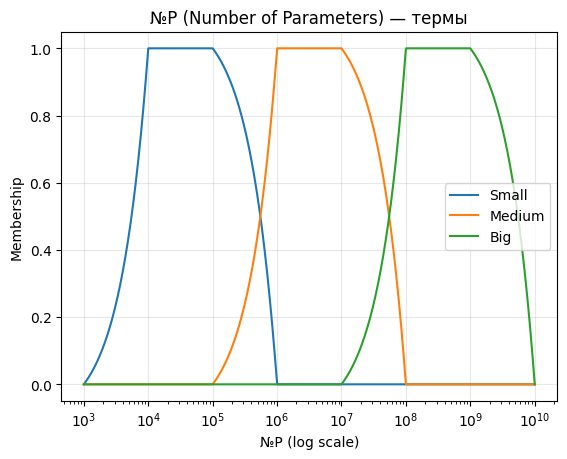

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def trapmf(x, a, b, c, d):
    x = np.asarray(x, dtype=float)
    y = np.zeros_like(x)

    # rising
    if b > a:
        idx = (x >= a) & (x < b)
        y[idx] = (x[idx] - a) / (b - a)
    else:
        y[x <= b] = 1.0

    # top
    idx = (x >= b) & (x <= c)
    y[idx] = 1.0

    # falling
    if d > c:
        idx = (x > c) & (x <= d)
        y[idx] = (d - x[idx]) / (d - c)
    else:
        y[x >= c] = 1.0

    y[(x < a) | (x > d)] = 0.0
    return y

def trapmf_single(x, params):
    a, b, c, d = params
    return float(trapmf(np.array([x]), a, b, c, d)[0])

# --- Вход 1: №P (Number of Parameters) ---
P_terms = {
    "Small":  (1e3, 1e4, 1e5, 1e6),
    "Medium": (1e5, 1e6, 1e7, 1e8),
    "Big":    (1e7, 1e8, 1e9, 1e10),
}

# --- Вход 2: Perf (Operations per second) ---
Perf_terms = {
    "Bad":        (1e10, 1e10, 1e12, 1e13),  # CPU
    "Acceptable": (1e11, 1e12, 1e13, 1e14),  # GPU
    "Good":       (1e13, 1e14, 1e15, 1e15),  # ASIC
}

# Нелинейные сетки для визуализации
p_x    = np.logspace(3, 10, 1400)
perf_x = np.logspace(10, 15, 1400)

plt.figure()
for name, params in P_terms.items():
    plt.plot(p_x, trapmf(p_x, *params), label=name)
plt.xscale("log")
plt.title("№P (Number of Parameters) — термы")
plt.xlabel("№P (log scale)")
plt.ylabel("Membership")
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


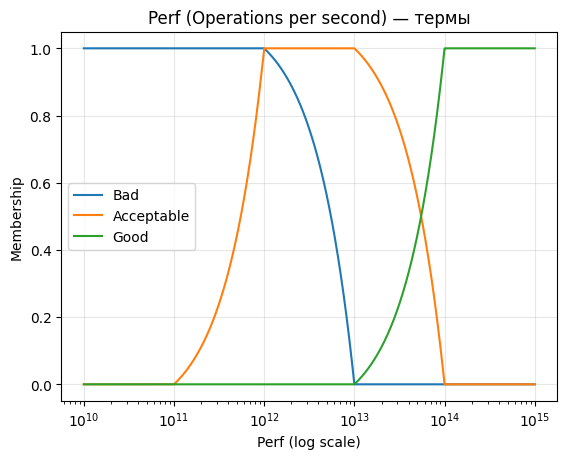

In [21]:
# график термов Perf (log)
plt.figure()
for name, params in Perf_terms.items():
    plt.plot(perf_x, trapmf(perf_x, *params), label=name)
plt.xscale("log")
plt.title("Perf (Operations per second) — термы")
plt.xlabel("Perf (log scale)")
plt.ylabel("Membership")
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [22]:
# Правила Сугено 2-й степени (полином) + инференс (без графиков)
# ВАЖНО: чтобы полином не "взрывался" на числах 1e3..1e15,
# используем входы u=log10(#P), v=log10(Perf) внутри заключений правил.
# Каждое правило задаёт квадратичный полином относительно du=u-u0 и dv=v-v0:
#   T = base * (1 + a1*du + a2*dv + a3*du^2 + a4*dv^2 + a5*du*dv)
# где base — "типичное" время для данной пары термов (в секундах).

def to_seconds(value, unit):
    unit = unit.lower()
    if unit in ["s", "sec", "second", "seconds"]:
        return float(value)
    if unit in ["min", "minute", "minutes"]:
        return float(value) * 60.0
    if unit in ["h", "hour", "hours"]:
        return float(value) * 3600.0
    if unit in ["day", "days", "d"]:
        return float(value) * 86400.0
    raise ValueError("Unknown unit")

# "Центры" термов в log10-шкале (можно менять, но важно сохранять порядок)
P_centers_log = {"Small": 5.0, "Medium": 7.0, "Big": 9.0}          # ~1e5,1e7,1e9
Perf_centers_log = {"Bad": 12.0, "Acceptable": 13.5, "Good": 15.0} # ~1e12,~3e13,1e15

# Базовые времена (как мы задумали: минуты / часы / дни)
base_T = {
    ("Small","Good"):       to_seconds(5,   "min"),
    ("Small","Acceptable"): to_seconds(30,  "min"),
    ("Small","Bad"):        to_seconds(3,   "h"),

    ("Medium","Good"):      to_seconds(2,   "h"),
    ("Medium","Acceptable"):to_seconds(12,  "h"),
    ("Medium","Bad"):       to_seconds(2,   "days"),

    ("Big","Good"):         to_seconds(10,  "h"),
    ("Big","Acceptable"):   to_seconds(2,   "days"),
    ("Big","Bad"):          to_seconds(10,  "days"),
}

# Коэффициенты кривизны/наклонов (одни и те же по всем правилам, чтобы модель была гладкой)
# du>0 => больше параметров => больше времени (a1>0)
# dv>0 => больше производительность => меньше времени (a2<0)
coeffs = dict(a1=0.45, a2=-0.55, a3=0.08, a4=0.06, a5=-0.04)

# 9 правил: (P_term, Perf_term) -> параметры полинома
sugeno_rules = []
for p_term in ["Small","Medium","Big"]:
    for perf_term in ["Bad","Acceptable","Good"]:
        sugeno_rules.append({
            "P_term": p_term,
            "Perf_term": perf_term,
            "u0": P_centers_log[p_term],
            "v0": Perf_centers_log[perf_term],
            "base": base_T[(p_term, perf_term)],
            **coeffs
        })

def firing_strength(P_value, Perf_value, P_term, Perf_term):
    mu_p    = trapmf_single(P_value,    P_terms[P_term])
    mu_perf = trapmf_single(Perf_value, Perf_terms[Perf_term])
    return min(mu_p, mu_perf), (mu_p, mu_perf)

def consequent_time_seconds(rule, P_value, Perf_value):
    # лог-преобразование только внутри заключений правил (для численной устойчивости)
    u = np.log10(P_value)
    v = np.log10(Perf_value)
    du = u - rule["u0"]
    dv = v - rule["v0"]

    base = rule["base"]
    a1, a2, a3, a4, a5 = rule["a1"], rule["a2"], rule["a3"], rule["a4"], rule["a5"]

    T = base * (1.0 + a1*du + a2*dv + a3*(du**2) + a4*(dv**2) + a5*(du*dv))
    return float(max(T, 1e-3))  # гарантируем положительность

def sugeno_infer(P_value, Perf_value):
    fired = []
    num = 0.0
    den = 0.0

    for r in sugeno_rules:
        w, mus = firing_strength(P_value, Perf_value, r["P_term"], r["Perf_term"])
        if w <= 0:
            continue
        z = consequent_time_seconds(r, P_value, Perf_value)  # <-- полином 2-й степени
        fired.append((r["P_term"], r["Perf_term"], w, mus, z))
        num += w * z
        den += w

    y = np.nan if den == 0 else num / den
    return fired, y  # seconds

def fmt_time(seconds):
    if np.isnan(seconds):
        return "NaN"
    s = float(seconds)
    if s < 120:
        return f"{s:.1f} s"
    if s < 7200:
        return f"{s/60:.2f} min"
    if s < 172800:
        return f"{s/3600:.2f} h"
    return f"{s/86400:.2f} days"


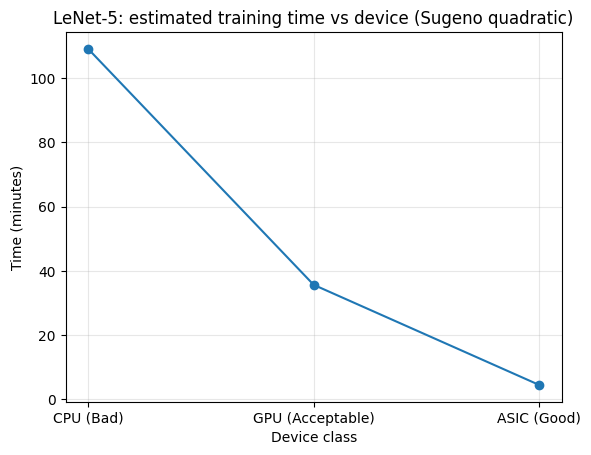

LeNet-5
  CPU (Bad), Perf=1e+12 -> T ≈ 109.13 min
  GPU (Acceptable), Perf=1e+13 -> T ≈ 35.69 min
  ASIC (Good), Perf=1e+15 -> T ≈ 4.52 min


In [23]:
# LeNet-5 — оценка времени на CPU/GPU/ASIC (1 график)
model_name = "LeNet-5"
P_model = 6e4

devices = [
    ("CPU (Bad)", 1e12),
    ("GPU (Acceptable)", 1e13),
    ("ASIC (Good)", 1e15),
]

times_sec = []
for _, perf in devices:
    _, y = sugeno_infer(P_model, perf)
    times_sec.append(y)

plt.figure()
plt.plot([d[0] for d in devices], [t/60 for t in times_sec], marker="o")
plt.title(f"{model_name}: estimated training time vs device (Sugeno quadratic)")
plt.xlabel("Device class")
plt.ylabel("Time (minutes)")
plt.grid(True, alpha=0.3)
plt.show()

print(model_name)
for (name, perf), t in zip(devices, times_sec):
    print(f"  {name}, Perf={perf:g} -> T ≈ {fmt_time(t)}")


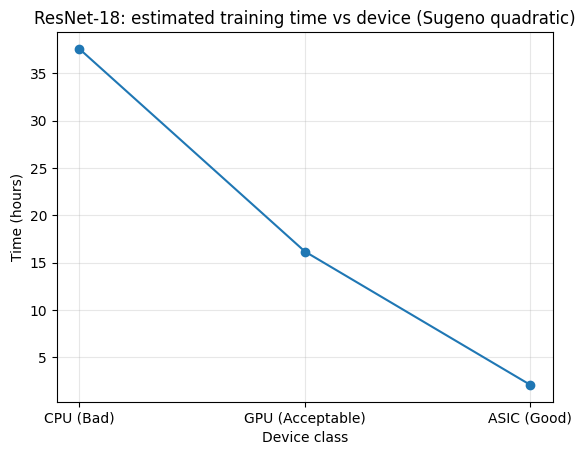

ResNet-18
  CPU (Bad), Perf=1e+12 -> T ≈ 37.57 h
  GPU (Acceptable), Perf=1e+13 -> T ≈ 16.19 h
  ASIC (Good), Perf=1e+15 -> T ≈ 2.10 h


In [24]:
# ResNet-18 — оценка времени на CPU/GPU/ASIC (1 график)
model_name = "ResNet-18"
P_model = 1.17e7

devices = [
    ("CPU (Bad)", 1e12),
    ("GPU (Acceptable)", 1e13),
    ("ASIC (Good)", 1e15),
]

times_sec = []
for _, perf in devices:
    _, y = sugeno_infer(P_model, perf)
    times_sec.append(y)

plt.figure()
plt.plot([d[0] for d in devices], [t/3600 for t in times_sec], marker="o")
plt.title(f"{model_name}: estimated training time vs device (Sugeno quadratic)")
plt.xlabel("Device class")
plt.ylabel("Time (hours)")
plt.grid(True, alpha=0.3)
plt.show()

print(model_name)
for (name, perf), t in zip(devices, times_sec):
    print(f"  {name}, Perf={perf:g} -> T ≈ {fmt_time(t)}")


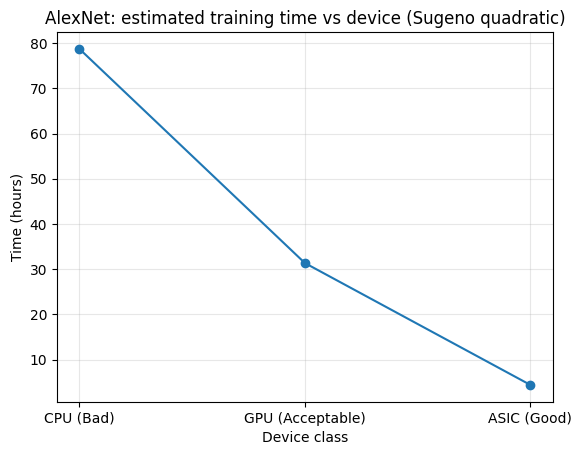

AlexNet
  CPU (Bad), Perf=1e+12 -> T ≈ 3.28 days
  GPU (Acceptable), Perf=1e+13 -> T ≈ 31.36 h
  ASIC (Good), Perf=1e+15 -> T ≈ 4.41 h


In [25]:
# AlexNet — оценка времени на CPU/GPU/ASIC (1 график)
model_name = "AlexNet"
P_model = 6e7

devices = [
    ("CPU (Bad)", 1e12),
    ("GPU (Acceptable)", 1e13),
    ("ASIC (Good)", 1e15),
]

times_sec = []
for _, perf in devices:
    _, y = sugeno_infer(P_model, perf)
    times_sec.append(y)

plt.figure()
plt.plot([d[0] for d in devices], [t/3600 for t in times_sec], marker="o")
plt.title(f"{model_name}: estimated training time vs device (Sugeno quadratic)")
plt.xlabel("Device class")
plt.ylabel("Time (hours)")
plt.grid(True, alpha=0.3)
plt.show()

print(model_name)
for (name, perf), t in zip(devices, times_sec):
    print(f"  {name}, Perf={perf:g} -> T ≈ {fmt_time(t)}")


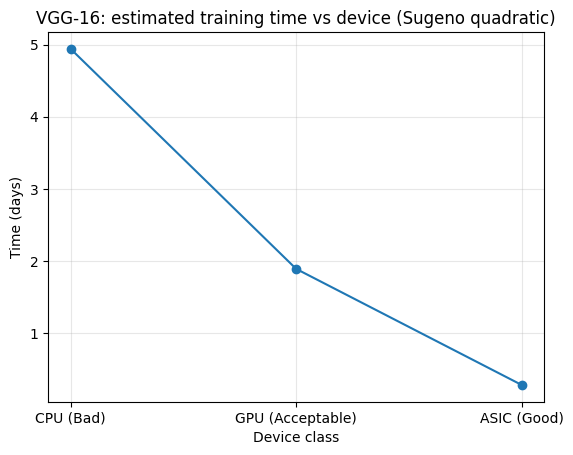

VGG-16
  CPU (Bad), Perf=1e+12 -> T ≈ 4.94 days
  GPU (Acceptable), Perf=1e+13 -> T ≈ 45.36 h
  ASIC (Good), Perf=1e+15 -> T ≈ 6.72 h


In [26]:
# VGG-16 — оценка времени на CPU/GPU/ASIC (1 график)
model_name = "VGG-16"
P_model = 1.38e8

devices = [
    ("CPU (Bad)", 1e12),
    ("GPU (Acceptable)", 1e13),
    ("ASIC (Good)", 1e15),
]

times_sec = []
for _, perf in devices:
    _, y = sugeno_infer(P_model, perf)
    times_sec.append(y)

plt.figure()
plt.plot([d[0] for d in devices], [t/86400 for t in times_sec], marker="o")
plt.title(f"{model_name}: estimated training time vs device (Sugeno quadratic)")
plt.xlabel("Device class")
plt.ylabel("Time (days)")
plt.grid(True, alpha=0.3)
plt.show()

print(model_name)
for (name, perf), t in zip(devices, times_sec):
    print(f"  {name}, Perf={perf:g} -> T ≈ {fmt_time(t)}")


In [27]:
# Веса устройств (один раз)
W_CPU, W_GPU, W_ASIC = 0.25, 0.50, 0.25

devices = [
    ("CPU (Bad)",        1e12, W_CPU),
    ("GPU (Acceptable)", 1e13, W_GPU),
    ("ASIC (Good)",      1e15, W_ASIC),
]

print("Device weights:")
for name, _, w in devices:
    print(f"  {name}: {w}")
print("Sum =", sum(w for *_, w in devices))


Device weights:
  CPU (Bad): 0.25
  GPU (Acceptable): 0.5
  ASIC (Good): 0.25
Sum = 1.0


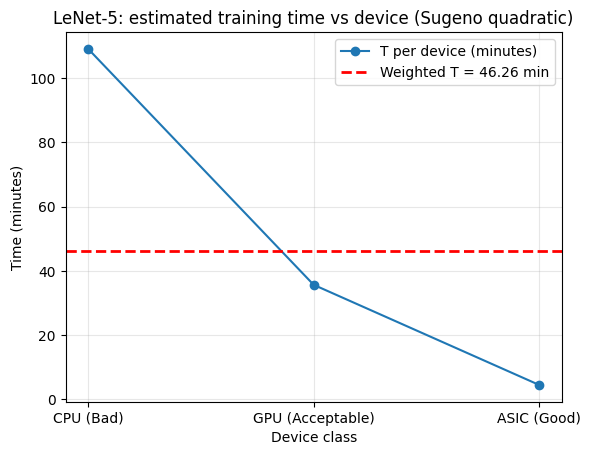

LeNet-5
  CPU (Bad), Perf=1e+12, w=0.25 -> T ≈ 109.13 min
  GPU (Acceptable), Perf=1e+13, w=0.50 -> T ≈ 35.69 min
  ASIC (Good), Perf=1e+15, w=0.25 -> T ≈ 4.52 min
  Weighted sum -> T_agg ≈ 46.26 min


In [28]:
# LeNet-5 — времена + агрегат (красная пунктирная линия), 1 график
model_name = "LeNet-5"
P_model = 6e4

times_sec = []
for _, perf, _ in devices:
    _, y = sugeno_infer(P_model, perf)
    times_sec.append(y)

times_sec = np.array(times_sec, dtype=float)
weights = np.array([w for *_, w in devices], dtype=float)
T_agg = float(np.sum(times_sec * weights))

plt.figure()
plt.plot([d[0] for d in devices], times_sec/60, marker="o", label="T per device (minutes)")
plt.axhline(T_agg/60, color="red", linestyle="--", linewidth=2, label=f"Weighted T = {fmt_time(T_agg)}")
plt.title(f"{model_name}: estimated training time vs device (Sugeno quadratic)")
plt.xlabel("Device class")
plt.ylabel("Time (minutes)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(model_name)
for (name, perf, w), t in zip(devices, times_sec):
    print(f"  {name}, Perf={perf:g}, w={w:.2f} -> T ≈ {fmt_time(t)}")
print(f"  Weighted sum -> T_agg ≈ {fmt_time(T_agg)}")


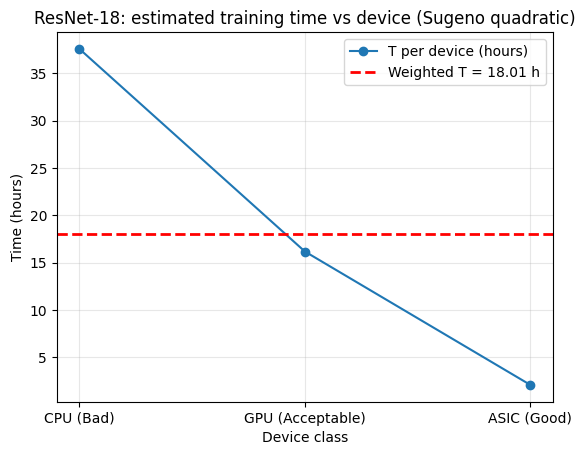

ResNet-18
  CPU (Bad), Perf=1e+12, w=0.25 -> T ≈ 37.57 h
  GPU (Acceptable), Perf=1e+13, w=0.50 -> T ≈ 16.19 h
  ASIC (Good), Perf=1e+15, w=0.25 -> T ≈ 2.10 h
  Weighted sum -> T_agg ≈ 18.01 h


In [29]:
# ResNet-18 — времена + агрегат (красная пунктирная линия), 1 график
model_name = "ResNet-18"
P_model = 1.17e7

times_sec = []
for _, perf, _ in devices:
    _, y = sugeno_infer(P_model, perf)
    times_sec.append(y)

times_sec = np.array(times_sec, dtype=float)
weights = np.array([w for *_, w in devices], dtype=float)
T_agg = float(np.sum(times_sec * weights))

plt.figure()
plt.plot([d[0] for d in devices], times_sec/3600, marker="o", label="T per device (hours)")
plt.axhline(T_agg/3600, color="red", linestyle="--", linewidth=2, label=f"Weighted T = {fmt_time(T_agg)}")
plt.title(f"{model_name}: estimated training time vs device (Sugeno quadratic)")
plt.xlabel("Device class")
plt.ylabel("Time (hours)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(model_name)
for (name, perf, w), t in zip(devices, times_sec):
    print(f"  {name}, Perf={perf:g}, w={w:.2f} -> T ≈ {fmt_time(t)}")
print(f"  Weighted sum -> T_agg ≈ {fmt_time(T_agg)}")


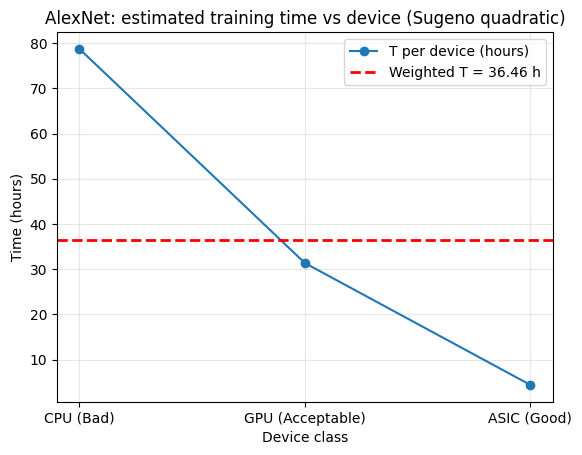

AlexNet
  CPU (Bad), Perf=1e+12, w=0.25 -> T ≈ 3.28 days
  GPU (Acceptable), Perf=1e+13, w=0.50 -> T ≈ 31.36 h
  ASIC (Good), Perf=1e+15, w=0.25 -> T ≈ 4.41 h
  Weighted sum -> T_agg ≈ 36.46 h


In [30]:
# AlexNet — времена + агрегат (красная пунктирная линия), 1 график
model_name = "AlexNet"
P_model = 6e7

times_sec = []
for _, perf, _ in devices:
    _, y = sugeno_infer(P_model, perf)
    times_sec.append(y)

times_sec = np.array(times_sec, dtype=float)
weights = np.array([w for *_, w in devices], dtype=float)
T_agg = float(np.sum(times_sec * weights))

plt.figure()
plt.plot([d[0] for d in devices], times_sec/3600, marker="o", label="T per device (hours)")
plt.axhline(T_agg/3600, color="red", linestyle="--", linewidth=2, label=f"Weighted T = {fmt_time(T_agg)}")
plt.title(f"{model_name}: estimated training time vs device (Sugeno quadratic)")
plt.xlabel("Device class")
plt.ylabel("Time (hours)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(model_name)
for (name, perf, w), t in zip(devices, times_sec):
    print(f"  {name}, Perf={perf:g}, w={w:.2f} -> T ≈ {fmt_time(t)}")
print(f"  Weighted sum -> T_agg ≈ {fmt_time(T_agg)}")


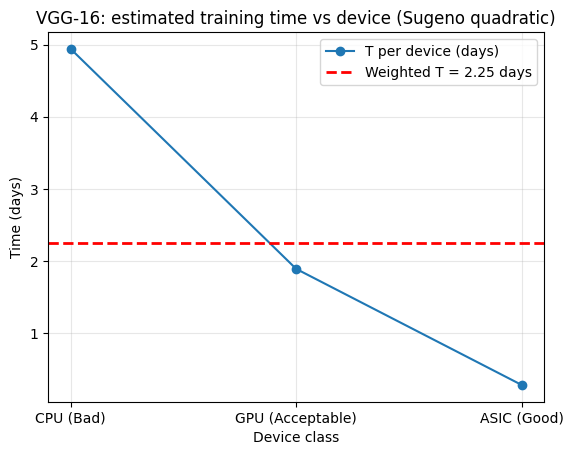

VGG-16
  CPU (Bad), Perf=1e+12, w=0.25 -> T ≈ 4.94 days
  GPU (Acceptable), Perf=1e+13, w=0.50 -> T ≈ 45.36 h
  ASIC (Good), Perf=1e+15, w=0.25 -> T ≈ 6.72 h
  Weighted sum -> T_agg ≈ 2.25 days


In [31]:
# VGG-16 — времена + агрегат (красная пунктирная линия), 1 график
model_name = "VGG-16"
P_model = 1.38e8

times_sec = []
for _, perf, _ in devices:
    _, y = sugeno_infer(P_model, perf)
    times_sec.append(y)

times_sec = np.array(times_sec, dtype=float)
weights = np.array([w for *_, w in devices], dtype=float)
T_agg = float(np.sum(times_sec * weights))

plt.figure()
plt.plot([d[0] for d in devices], times_sec/86400, marker="o", label="T per device (days)")
plt.axhline(T_agg/86400, color="red", linestyle="--", linewidth=2, label=f"Weighted T = {fmt_time(T_agg)}")
plt.title(f"{model_name}: estimated training time vs device (Sugeno quadratic)")
plt.xlabel("Device class")
plt.ylabel("Time (days)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(model_name)
for (name, perf, w), t in zip(devices, times_sec):
    print(f"  {name}, Perf={perf:g}, w={w:.2f} -> T ≈ {fmt_time(t)}")
print(f"  Weighted sum -> T_agg ≈ {fmt_time(T_agg)}")


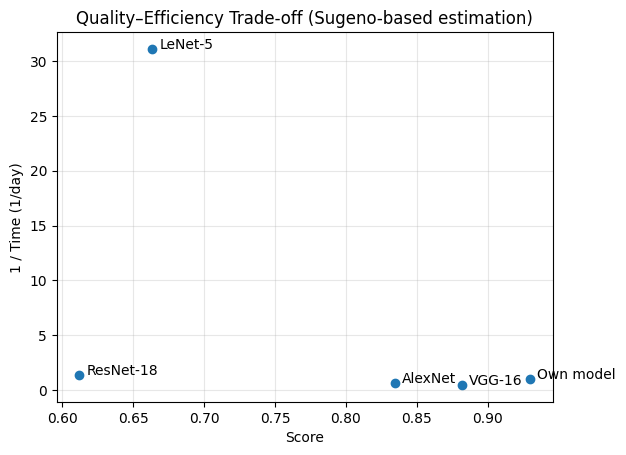

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# ===== Models =====
models = ["ResNet-18", "AlexNet", "VGG-16", "Own model", "LeNet-5"]

# ===== Scores (normalized) =====
scores = np.array([
    0.6121,  # ResNet-18
    0.8345,  # AlexNet
    0.8820,  # VGG-16
    0.93,     # Own model
    0.6636  # LeNet-5
])

# ===== Aggregated training times =====
# Explicit conversion to days
T_lenet_days   = 46.26 / (60 * 24)   # 46.26 minutes
T_resnet_days  = 18.01 / 24          # 18.01 hours
T_alexnet_days = 36.46 / 24          # 36.46 hours
T_vgg_days     = 2.25                # 2.25 days
T_own_days     = 1.0                 # given

times_days = np.array([
    T_resnet_days,
    T_alexnet_days,
    T_vgg_days,
    T_own_days,
    T_lenet_days
])

# ===== Efficiency: y = 1 / Time =====
inv_time = 1.0 / times_days

# ===== Plot =====
plt.figure()
plt.scatter(scores, inv_time)

for x, y, name in zip(scores, inv_time, models):
    plt.text(x + 0.005, y, name)

plt.xlabel("Score")
plt.ylabel("1 / Time (1/day)")
plt.title("Quality–Efficiency Trade-off (Sugeno-based estimation)")
plt.grid(True, alpha=0.3)
plt.show()


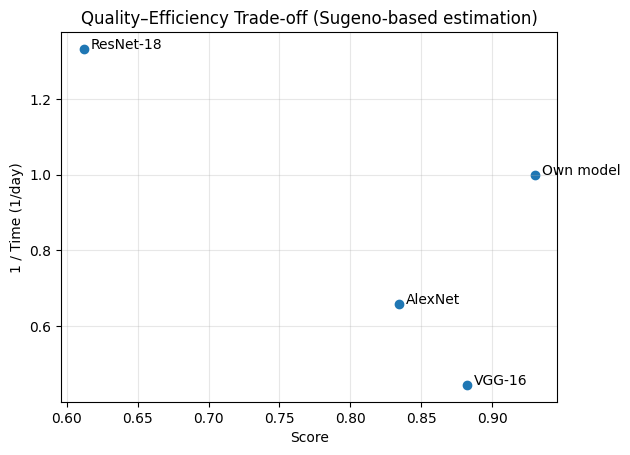

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# ===== Models =====
models = ["ResNet-18", "AlexNet", "VGG-16", "Own model"]

# ===== Scores (normalized) =====
scores = np.array([
    0.6121,  # ResNet-18
    0.8345,  # AlexNet
    0.8820,  # VGG-16
    0.93,     # Own model
])

# ===== Aggregated training times =====
# Explicit conversion to days
T_lenet_days   = 46.26 / (60 * 24)   # 46.26 minutes
T_resnet_days  = 18.01 / 24          # 18.01 hours
T_alexnet_days = 36.46 / 24          # 36.46 hours
T_vgg_days     = 2.25                # 2.25 days
T_own_days     = 1.0                 # given

times_days = np.array([
    T_resnet_days,
    T_alexnet_days,
    T_vgg_days,
    T_own_days,
])

# ===== Efficiency: y = 1 / Time =====
inv_time = 1.0 / times_days

# ===== Plot =====
plt.figure()
plt.scatter(scores, inv_time)

for x, y, name in zip(scores, inv_time, models):
    plt.text(x + 0.005, y, name)

plt.xlabel("Score")
plt.ylabel("1 / Time (1/day)")
plt.title("Quality–Efficiency Trade-off (Sugeno-based estimation)")
plt.grid(True, alpha=0.3)
plt.show()
